In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from phik import phik_from_array, significance_from_array

# model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# import the model
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

# metrics
from sklearn.metrics import r2_score

# serializing
import pickle

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/zobekenobe/Files/main/boston_house_rent.csv')

In [9]:
df.shape

(506, 14)

In [10]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [12]:
# checking for null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


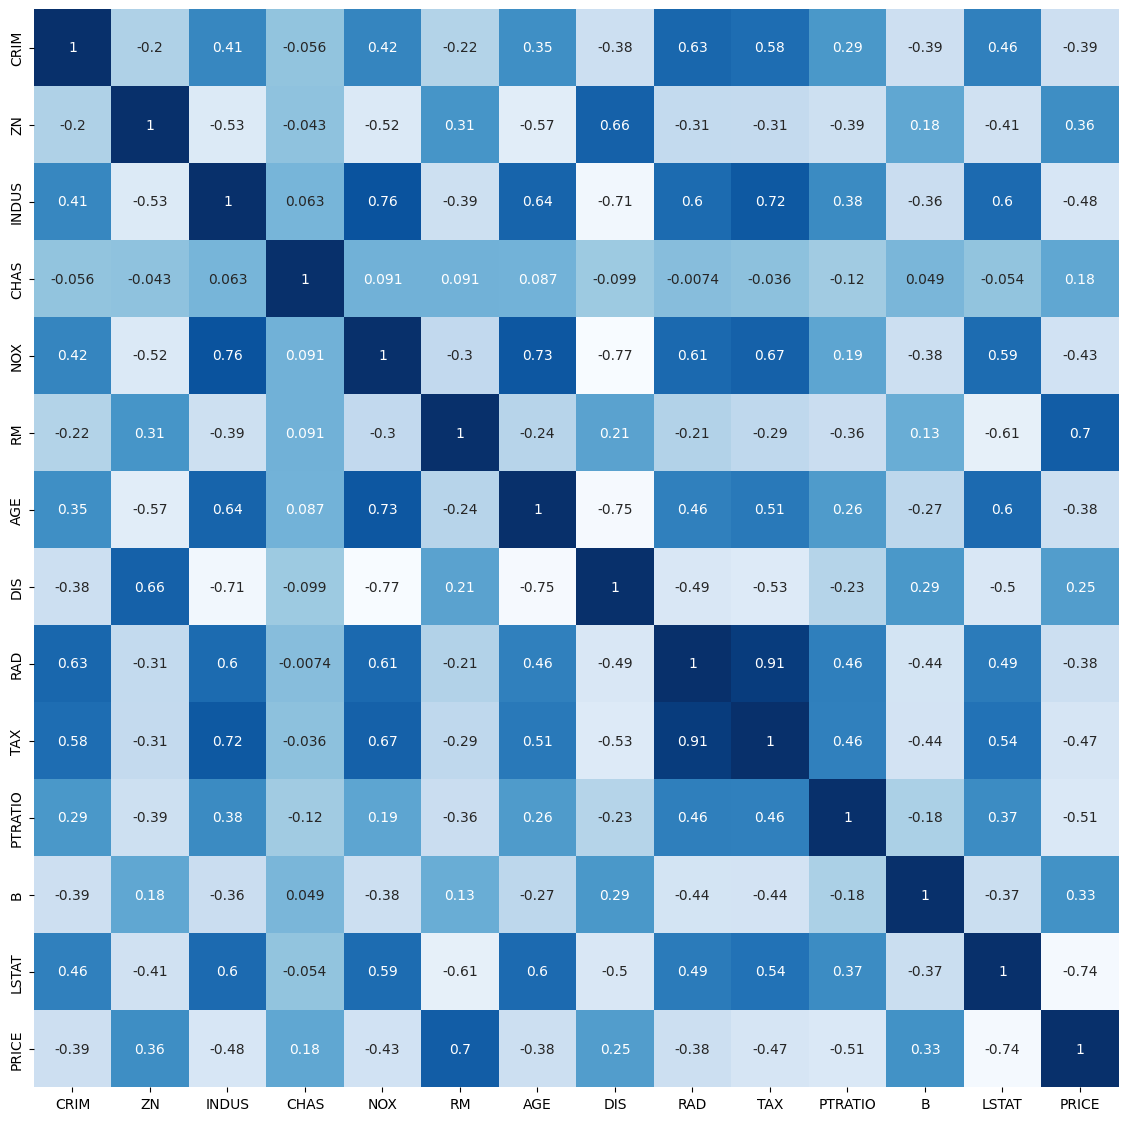

In [17]:
plt.figure(figsize = (14, 14))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', cbar = False)
plt.show()

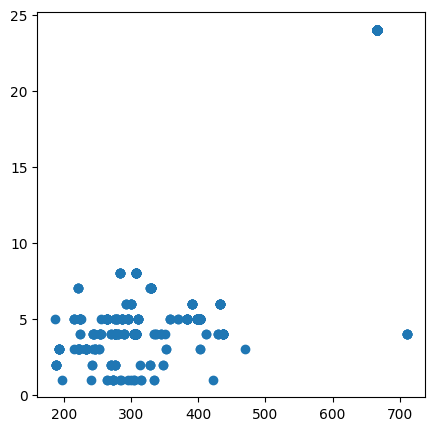

In [20]:
plt.figure(figsize = (5,5))
plt.scatter(df['TAX'], df['RAD'])

In [22]:
# model evaluation
xtrain, xtest, ytrain, ytest = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size = 0.25, random_state = 42)

In [23]:
ada = AdaBoostRegressor()
xgb = XGBRegressor()

In [24]:
ada.fit(xtrain, ytrain)
xgb.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [27]:
print(f"AdaBoost : {r2_score(ada.predict(xtest), ytest)}")
print(f"XGBoost  : {r2_score(xgb.predict(xtest), ytest)}")

AdaBoost : 0.6249897880444681
XGBoost  : 0.8199543848481917


In [28]:
# Using RandomizedSearchCV for model tuning
from sklearn.model_selection import RandomizedSearchCV

In [35]:
param_grid = {'loss' : ['linear', 'square', 'exponential'], 'n_estimators' : range(40, 100, 10), 'learning_rate' : [0.24, 0.3, 0.4, 0.5]}

In [36]:
gca = GridSearchCV(estimator = AdaBoostRegressor(), param_grid = param_grid, n_jobs = -1, cv = 5)

In [37]:
gca.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.24, 0.3, 0.4, 0.5],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': range(40, 100, 10)})

In [38]:
best_model_ada = gca.best_estimator_

In [39]:
param_grid = {'n_estimators' : range(40, 100, 10)}

In [40]:
# model tuning on the xgboost
gcx = GridSearchCV(XGBRegressor(), param_grid = param_grid, n_jobs = -1, cv = 5)

In [41]:
gcx.fit(xtrain, ytrain)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1, param_grid={'n_estimators': range(40, 100, 10)})

In [42]:
best_model_xgb = gcx.best_estimator_

In [43]:
# comparing the two models accuracy 
print(f"AdaBoost : {r2_score(best_model_ada.predict(xtest), ytest)}")
print(f"XGBoost  : {r2_score(best_model_xgb.predict(xtest), ytest)}")

AdaBoost : 0.6729224490786879
XGBoost  : 0.8197743201174711


In [49]:
sample = df.iloc[0, :-1].values

In [54]:
xgb.predict(sample.reshape(1, -1))

array([27.180908], dtype=float32)

In [55]:
df.iloc[0, -1]

24.0

In [ ]:
with open('boston_housing.pkl', 'wb') as f:
    pickle.dump()